# Datamining Project - Spotify Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Data understanding and preparation

### Dataset Import and simple data visualization

In [64]:
df_train = pd.read_csv('train.csv', skipinitialspace=True)

df_test = pd.read_csv('test.csv', skipinitialspace=True)

## Converting genre from strings to numbers [0,19]

In [65]:
# metto i generi in un array
genres = df_train['genre'].unique()
# creo un dizionario per tenerli associati ad un numero
genres_dict = dict(zip(genres, range(len(genres))))

In [66]:
# Mappo i generi con i numeri
df_train['genre'] = df_train['genre'].map(genres_dict)
df_test['genre'] = df_test['genre'].map(genres_dict)
print(genres_dict)

{'j-dance': 0, 'iranian': 1, 'black-metal': 2, 'bluegrass': 3, 'happy': 4, 'industrial': 5, 'j-idol': 6, 'spanish': 7, 'sleep': 8, 'techno': 9, 'mandopop': 10, 'afrobeat': 11, 'disney': 12, 'study': 13, 'indian': 14, 'idm': 15, 'forro': 16, 'chicago-house': 17, 'brazil': 18, 'breakbeat': 19}


In [67]:
df_train['min_duration'] = round(df_train['duration_ms'] / 60000, 2)
df_train['min_features_duration'] = round(df_train['features_duration_ms'] / 60000, 2)

min_duration = df_train.pop('min_duration')
df_train.insert(df_train.columns.get_loc('duration_ms') + 1, 'min_duration', min_duration)
min_features_duration = df_train.pop('min_features_duration')
df_train.insert(df_train.columns.get_loc('features_duration_ms') + 1, 'min_features_duration', min_features_duration)

In [36]:
df_test.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [37]:
df_train

,name,duration_ms,min_duration,explicit,popularity,artists,album_name,danceability,energy,key,...,valence,tempo,features_duration_ms,features_,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,4.03,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,...,0.6350,142.221,241760,4.03,4.0,567.0,141.0,NaN,1.279305,0
1,"Daniâl My Son, Where Did You Vanish?",444000,7.40,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,...,0.0336,75.596,444000,7.40,4.0,617.0,155.0,NaN,2.367412,1
2,Ondskapens Galakse,333506,5.56,False,3,Kvelertak,Nattesferd,0.363,0.854,2,...,0.4890,116.628,333507,5.56,4.0,652.0,162.0,NaN,3.700483,2
3,Can't Look Away,269800,4.50,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,...,0.3850,140.880,269800,4.50,4.0,619.0,155.0,0.469,1.279305,3
4,Thunderground,307651,5.13,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,...,0.6370,143.956,307652,5.13,4.0,733.0,183.0,NaN,4.067086,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,7.20,False,0,Autechre,EP7,0.554,0.657,1,...,0.0335,117.319,432027,7.20,NaN,837.0,212.0,NaN,2.367412,15
14996,Natural Environment Sounds: To Improve Sleep a...,182746,3.05,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,...,0.0016,92.323,182747,3.05,3.0,277.0,92.0,NaN,2.367412,8
14997,Psychological Attack,400091,6.67,False,43,Droplex,Psychological Attack,0.799,0.535,1,...,0.0708,126.000,400091,6.67,4.0,837.0,209.0,NaN,2.367412,9
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,3.29,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,...,0.2700,160.044,197250,3.29,4.0,513.0,130.0,NaN,1.279305,19


In [38]:
df_train.shape

(15000, 26)

In [39]:
df_train.dtypes

name                      object
duration_ms                int64
min_duration             float64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
features_                float64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                      int64
dtype: object

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   min_duration           15000 non-null  float64
 3   explicit               15000 non-null  bool   
 4   popularity             15000 non-null  int64  
 5   artists                15000 non-null  object 
 6   album_name             15000 non-null  object 
 7   danceability           15000 non-null  float64
 8   energy                 15000 non-null  float64
 9   key                    15000 non-null  int64  
 10  loudness               15000 non-null  float64
 11  mode                   10550 non-null  float64
 12  speechiness            15000 non-null  float64
 13  acousticness           15000 non-null  float64
 14  instrumentalness       15000 non-null  float64
 15  li

In [41]:
df_train.describe()

,duration_ms,min_duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,features_duration_ms,features_,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,15000.000000,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000.000000
mean,2.468075e+05,4.113412,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,...,0.436853,123.116544,2.467947e+05,4.113197,3.876179,501.862333,128.39340,0.490479,2.199647,9.500000
std,1.279941e+05,2.133214,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,...,0.277220,31.930958,1.279850e+05,2.133063,0.566491,280.689804,75.11391,0.291330,1.212616,5.766474
min,8.586000e+03,0.140000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.587000e+03,0.140000,0.000000,0.000000,0.00000,0.000000,0.748116,0.000000
25%,1.800000e+05,3.000000,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,...,0.196000,99.939000,1.800000e+05,3.000000,4.000000,327.000000,83.00000,0.230000,1.170953,4.750000
50%,2.278260e+05,3.800000,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,...,0.416000,124.188000,2.278185e+05,3.800000,4.000000,461.000000,117.00000,0.480000,1.738916,9.500000
75%,2.889030e+05,4.812500,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,...,0.664000,141.986500,2.889030e+05,4.812500,4.000000,625.000000,159.00000,0.739000,3.349057,14.250000
max,4.120258e+06,68.670000,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,...,0.995000,220.525000,4.120258e+06,68.670000,5.000000,7348.000000,2170.00000,1.000000,4.067086,19.000000


In [42]:
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'features_duration_ms'], axis=1)
df_mean.groupby(['genre']).mean().T

genre,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
duration_ms,197655.825333,318245.033333,312680.757333,224340.145333,238628.281333,257821.650667,255980.600000,227925.829333,184629.184000,294924.873333,255450.208000,255761.637333,151753.028000,144137.786667,250070.477333,266994.798667,202532.865333,327283.858667,272329.881333,297002.881333
min_duration,3.294187,5.304027,5.211053,3.739040,3.977227,4.296893,4.266120,3.798880,3.077107,4.915387,4.257480,4.262653,2.529227,2.402200,4.167693,4.449827,3.375627,5.454787,4.538893,4.949933
popularity,23.253333,4.152000,22.160000,26.738667,19.032000,30.352000,25.892000,38.032000,35.045333,32.648000,42.684000,25.104000,25.397333,22.005333,45.325333,12.369333,36.796000,17.185333,43.029333,21.272000
danceability,0.669460,0.304377,0.298734,0.538100,0.574681,0.531588,0.546007,0.615171,0.210707,0.665987,0.535114,0.631279,0.518562,0.683887,0.566914,0.535110,0.632316,0.753515,0.554036,0.655724
energy,0.704638,0.546381,0.875368,0.537173,0.907287,0.864379,0.856806,0.705413,0.361179,0.741245,0.498937,0.675015,0.348533,0.411714,0.551567,0.578247,0.771311,0.736044,0.618380,0.835011
key,5.134667,5.238667,5.504000,5.438667,5.769333,5.520000,5.097333,5.362667,4.858667,5.365333,5.222667,5.372000,4.386667,5.506667,5.077333,5.230667,5.168000,5.736000,5.357333,5.410667
loudness,-6.104521,-12.863459,-6.508709,-9.783220,-5.203780,-5.756509,-3.931972,-6.587379,-23.081637,-7.975337,-8.451313,-8.225705,-13.748233,-10.784156,-9.292241,-11.765193,-5.505208,-8.546865,-7.759363,-6.025184
speechiness,0.206154,0.089048,0.087969,0.041848,0.112075,0.086930,0.070055,0.095751,0.059597,0.072713,0.039243,0.079777,0.084048,0.097786,0.067434,0.076632,0.055037,0.072934,0.094596,0.085956
acousticness,0.230750,0.404407,0.027036,0.539167,0.061112,0.035518,0.151007,0.277198,0.651964,0.089616,0.473100,0.274824,0.690654,0.521105,0.476783,0.353588,0.397581,0.047374,0.334509,0.040624
instrumentalness,0.028364,0.549633,0.438376,0.132831,0.217085,0.218341,0.030621,0.016250,0.683760,0.536801,0.018452,0.256546,0.312890,0.752711,0.065263,0.656057,0.013158,0.421360,0.022967,0.363216


### Checking for duplicated records

In [43]:
# Checking for duplicated records

print(df_train.duplicated().sum(), df_test.duplicated().sum())


0 0


In [44]:
# Checking for duplicated songs
print(df_train['name'].duplicated().sum(), df_test['name'].duplicated().sum())

0 0


In [45]:
# Checking differences between duration_ms and features_duration_ms, also there we can notice that most records differ by 1

values = df_train[df_train['duration_ms'] != df_train['features_duration_ms']]
columns_to_print = ['duration_ms', 'features_duration_ms']
values[columns_to_print]

valu = values['features_duration_ms'] - values['duration_ms']

print("Number of different records: ", valu.size)

differences_count = 0
for i in valu:
    if(i != 1 and i != -1):
        differences_count += 1
        
print("Number of different records with a difference greater than 1: ", differences_count)

Number of different records:  5832
Number of different records with a difference greater than 1:  76


### Checking for NaN values

In [46]:
for column in list(df_train.columns):
    containsNaN = df_train[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

Column: mode hasNaN: 4450
Column: time_signature hasNaN: 2062
Column: popularity_confidence hasNaN: 12783


In [47]:
for column in list(df_test.columns):
    containsNaN = df_test[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

Column: mode hasNaN: 1461
Column: time_signature hasNaN: 725
Column: popularity_confidence hasNaN: 4279


In [48]:
df_test['popularity_confidence'].isnull().sum()

4279

### Data distribution


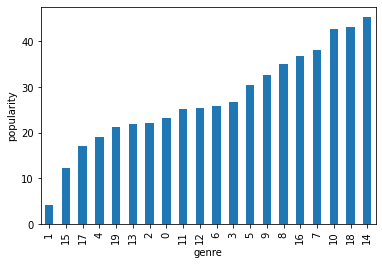

In [49]:
df_train.groupby('genre')['popularity'].mean().sort_values().plot(kind='bar')
plt.ylabel('popularity')
plt.show()

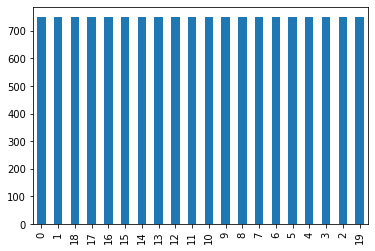

In [50]:
df_train['genre'].value_counts().plot(kind='bar')
plt.show()

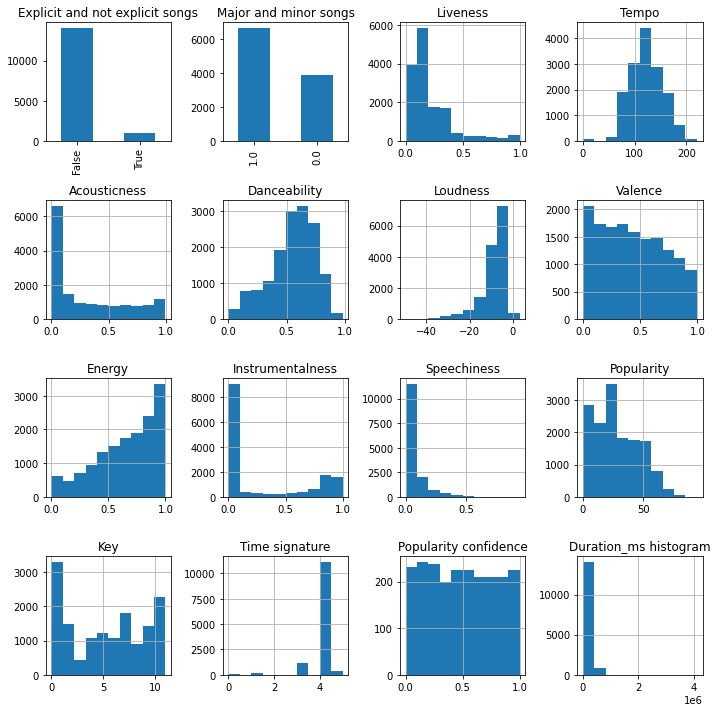

In [51]:
#Plotting the distribution of the features

fig = plt.figure (figsize = (10,10))
fig_dims = (4,4)

plt.subplot2grid(fig_dims, (0,0))
df_train['explicit'].value_counts().plot(kind='bar', title='Explicit and not explicit songs')

plt.subplot2grid(fig_dims, (0,1))
df_train['mode'].value_counts().plot(kind='bar', title='Major and minor songs')

plt.subplot2grid(fig_dims, (1,0))
df_train['acousticness'].hist()
plt.title('Acousticness')

plt.subplot2grid(fig_dims, (1,1))
df_train['danceability'].hist()
plt.title('Danceability')

plt.subplot2grid(fig_dims, (2,0))
df_train['energy'].hist()
plt.title('Energy')

plt.subplot2grid(fig_dims, (2,1))
df_train['instrumentalness'].hist()
plt.title('Instrumentalness')

plt.subplot2grid(fig_dims, (0,2))
df_train['liveness'].hist()
plt.title('Liveness')

plt.subplot2grid(fig_dims, (1,2))
df_train['loudness'].hist()
plt.title('Loudness')

plt.subplot2grid(fig_dims, (2,2))
df_train['speechiness'].hist()
plt.title('Speechiness')

plt.subplot2grid(fig_dims, (0,3))
df_train['tempo'].hist()
plt.title('Tempo')

plt.subplot2grid(fig_dims, (1,3))
df_train['valence'].hist()
plt.title('Valence')

plt.subplot2grid(fig_dims, (2,3))
df_train['popularity'].hist()
plt.title('Popularity')

plt.subplot2grid(fig_dims, (3,0))
df_train['key'].hist()
plt.title('Key')

plt.subplot2grid(fig_dims, (3,1))
df_train['time_signature'].hist()
plt.title('Time signature')

plt.subplot2grid(fig_dims, (3,2))
df_train['popularity_confidence'].hist()
plt.title('Popularity confidence')

plt.subplot2grid(fig_dims, (3,3))
df_train['duration_ms'].hist()
plt.title('Duration_ms histogram')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of beats')

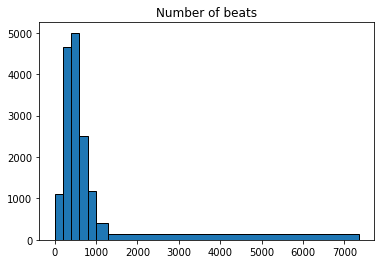

In [52]:
#Plotting the distribution of the n_beats feature
plt.hist(df_train['n_beats'], bins=[0, 200, 400, 600, 800, 1000, 1300, max(df_train['n_beats'])], edgecolor='black')
plt.title('Number of beats')


Text(0.5, 1.0, 'Number of bars')

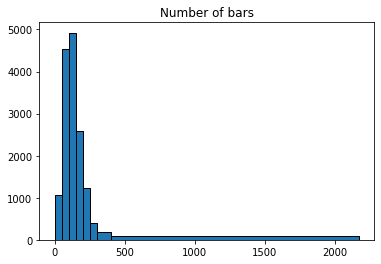

In [53]:
#Plotting the distribution of the n_bars feature
plt.hist(df_train['n_bars'], bins=[0,50, 100,150, 200, 250,300,400, max(df_train['n_bars'])], edgecolor='black')
plt.title('Number of bars')

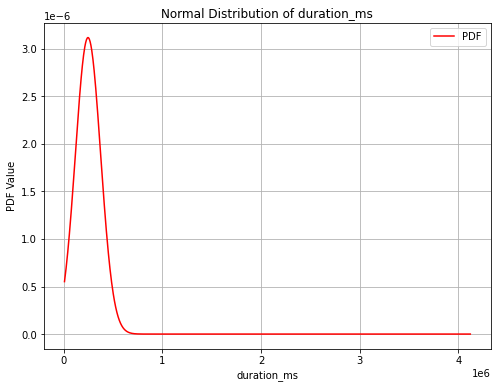

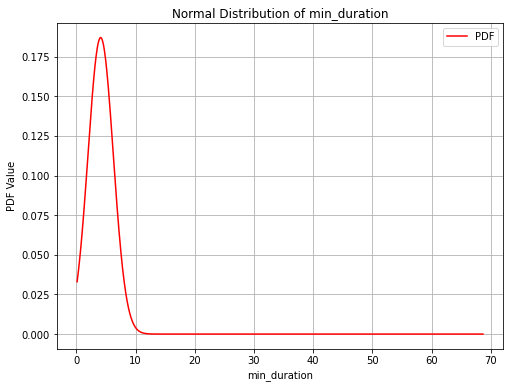

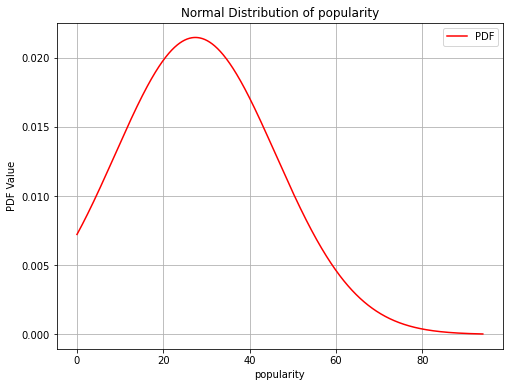

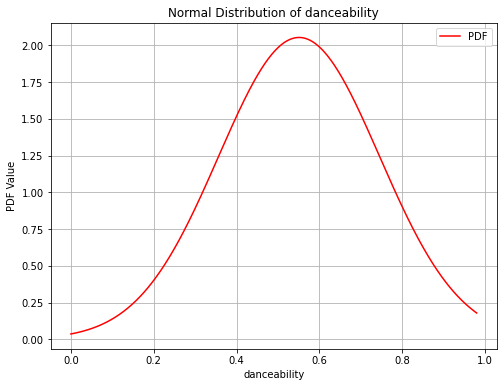

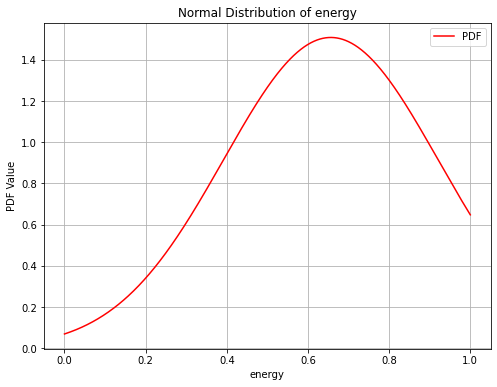

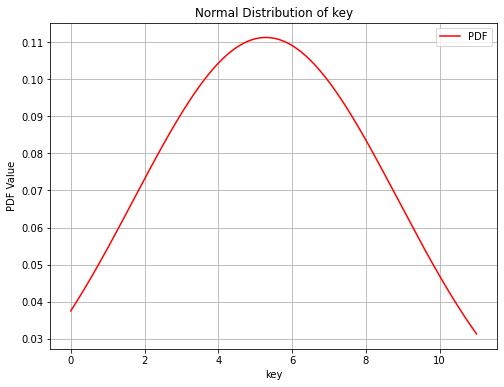

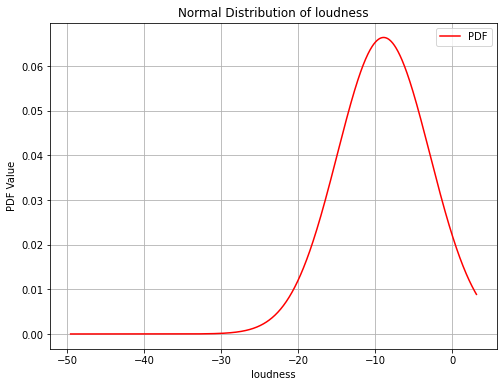

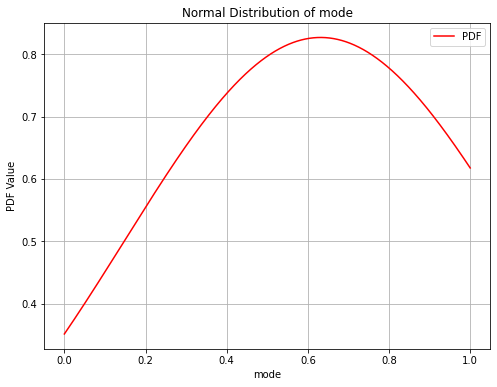

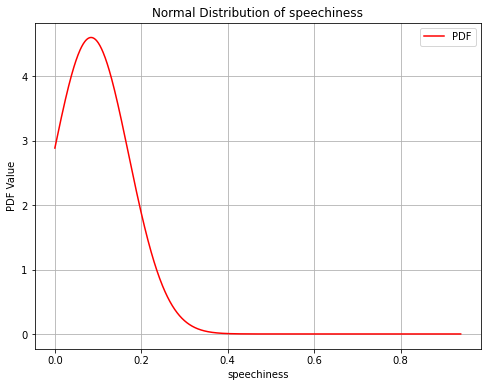

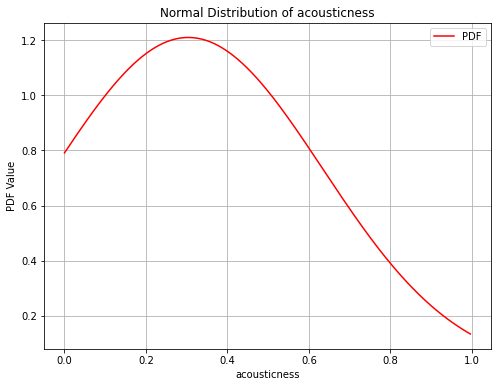

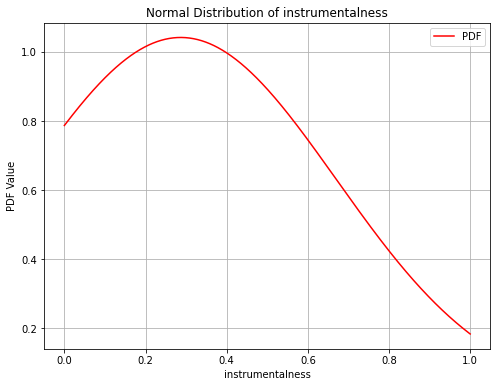

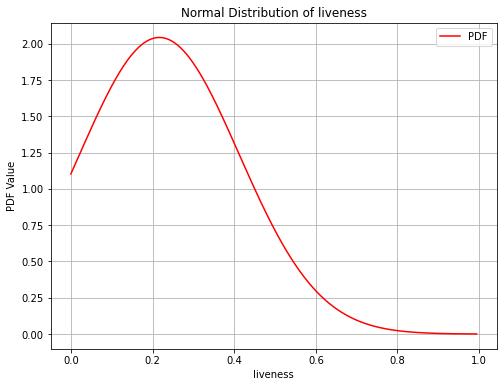

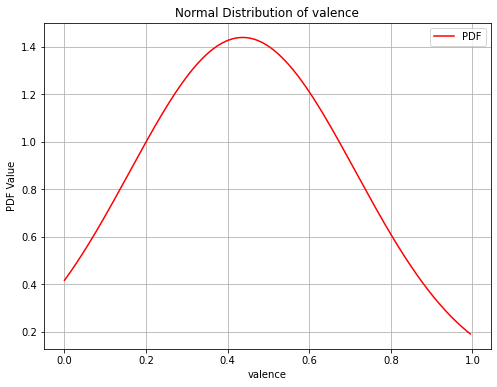

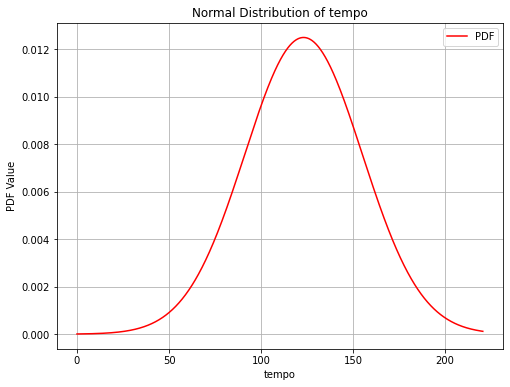

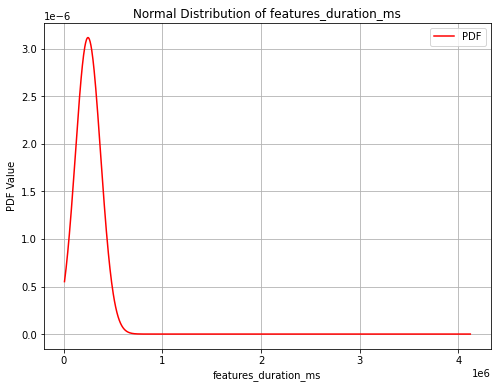

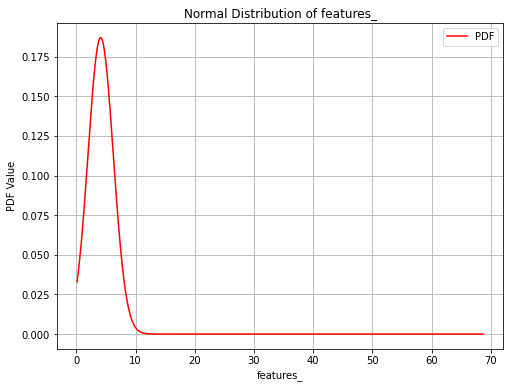

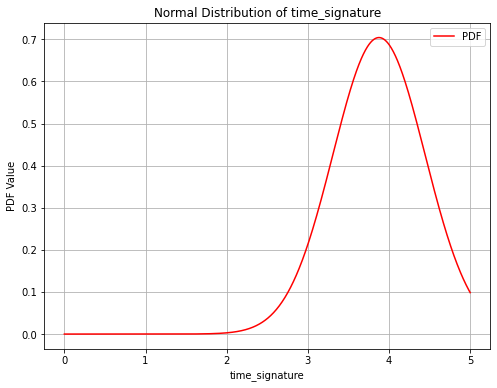

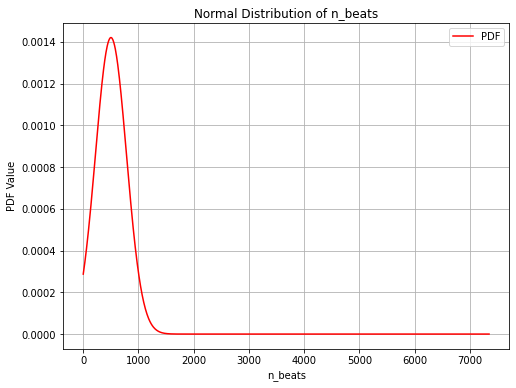

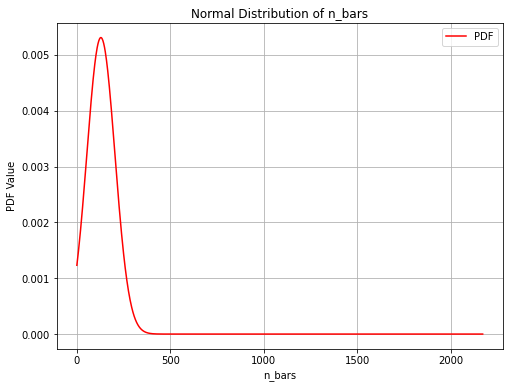

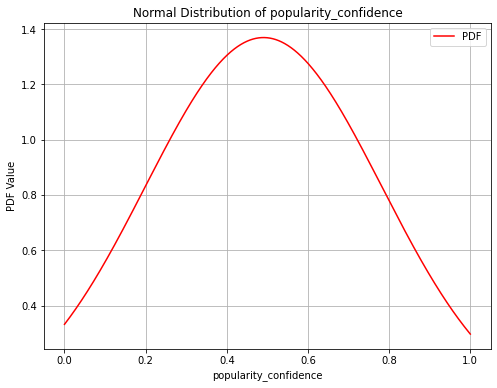

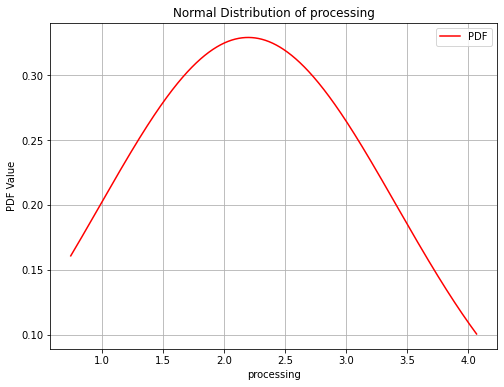

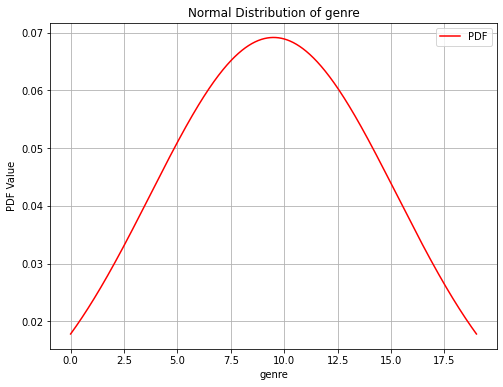

In [54]:
#Normal distribution of numerical values
from scipy.stats import norm

for attribute in list(df_train.columns):
    if(df_train[attribute].dtype == np.float64 or df_train[attribute].dtype == np.int64):
        x = np.linspace(df_train[attribute].min(), df_train[attribute].max(), 1000)

        mu = df_train[attribute].mean()
        sigma = df_train[attribute].std()

        # Calculate the PDF
        pdf = norm.pdf(x, loc=mu, scale=sigma)

        plt.figure(figsize=(8, 6))
        plt.plot(x, pdf, 'r', label='PDF')
        plt.xlabel(attribute)
        plt.ylabel('PDF Value')
        plt.title('Normal Distribution of ' + attribute)
        plt.legend()
        plt.grid()
        plt.show()

### Genre splitting and analysis

In [55]:
len(list(df_train['genre'].unique()))

20

In [56]:
genresData = []
for genre in df_train['genre'].unique():
    genresData.append(df_train[df_train['genre'] == genre])
    
genresData[0].describe()

,duration_ms,min_duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,features_duration_ms,features_,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,532.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,639.000000,750.000000,750.000000,102.000000,750.000000,750.0
mean,197655.825333,3.294187,23.253333,0.669460,0.704638,5.134667,-6.104521,0.541353,0.206154,0.230750,...,0.574876,116.152327,197656.249333,3.294187,4.067293,378.593333,95.770667,0.458902,2.171025,0.0
std,48780.756946,0.812911,16.338781,0.127982,0.151764,3.631453,2.495812,0.498756,0.136534,0.221923,...,0.216221,30.821687,48780.753023,0.812911,0.571127,145.336573,37.379956,0.283461,1.161046,0.0
min,44826.000000,0.750000,0.000000,0.256000,0.082600,0.000000,-18.982000,0.000000,0.024300,0.000019,...,0.034600,50.680000,44827.000000,0.750000,1.000000,75.000000,18.000000,0.006000,0.748116,0.0
25%,169740.750000,2.830000,14.000000,0.585250,0.604000,1.000000,-7.462500,0.000000,0.077925,0.050000,...,0.404000,96.032750,169741.500000,2.830000,4.000000,281.250000,71.000000,0.211250,1.170953,0.0
50%,190993.500000,3.180000,22.000000,0.675500,0.719500,5.000000,-5.743500,1.000000,0.198000,0.155000,...,0.593000,105.986000,190993.500000,3.180000,4.000000,340.000000,86.000000,0.480500,2.367412,0.0
75%,216231.500000,3.600000,31.000000,0.757000,0.820750,8.000000,-4.437250,1.000000,0.309000,0.349500,...,0.742750,132.017250,216232.250000,3.600000,4.000000,449.750000,113.000000,0.679250,3.349057,0.0
max,605100.000000,10.090000,80.000000,0.958000,0.993000,11.000000,-0.308000,1.000000,0.861000,0.995000,...,0.978000,212.276000,605100.000000,10.090000,5.000000,1164.000000,352.000000,0.990000,4.067086,0.0


In [57]:
import pandas as pd
from scipy.stats import pearsonr

# Initialize empty lists to store information
genre_list = []
feature_1_list = []
feature_2_list = []
correlation_list = []

for genre_df in genresData:
    # Drop NaN values and unwanted columns
    genre_df = genre_df.dropna(axis=1)
    genre_df = genre_df.drop(columns=['name', 'explicit', 'artists', 'album_name', 'features_duration_ms'], axis=1)
    genre = genre_df.iloc[0]['genre']
    
    for feature_1 in list(genre_df.columns):
        if feature_1 != 'genre':
            for feature_2 in list(genre_df.columns):
                if feature_2 != 'genre' and feature_1 != feature_2:
                    corr, p_val = pearsonr(genre_df[feature_1], genre_df[feature_2])
                    if abs(corr) > 0.7:  # Filter based on correlation threshold
                        if not feature_1 in feature_2_list or not feature_2 in feature_1_list:
                            genre_list.append(genre)
                            feature_1_list.append(feature_1)
                            feature_2_list.append(feature_2)
                            correlation_list.append(corr)

# Create a DataFrame from the lists
correlation_df = pd.DataFrame({
    'genre': genre_list,
    'feature_1': feature_1_list,
    'feature_2': feature_2_list,
    'correlation': correlation_list
})

correlation_df


,genre,feature_1,feature_2,correlation
0,0.0,duration_ms,min_duration,0.999994
1,0.0,duration_ms,features_,0.999994
2,0.0,duration_ms,n_beats,0.713244
3,0.0,duration_ms,n_bars,0.702246
4,0.0,min_duration,features_,1.000000
...,...,...,...,...
140,19.0,duration_ms,n_beats,0.940839
141,19.0,duration_ms,n_bars,0.940596
142,19.0,min_duration,n_bars,0.940619
143,19.0,features_,n_bars,0.940619


In [58]:
features_list = list(set(feature_1_list)) + list(set(feature_2_list))
features_list

['danceability',
 'n_beats',
 'loudness',
 'tempo',
 'features_',
 'min_duration',
 'duration_ms',
 'energy',
 'n_beats',
 'loudness',
 'acousticness',
 'valence',
 'features_',
 'min_duration',
 'n_bars']

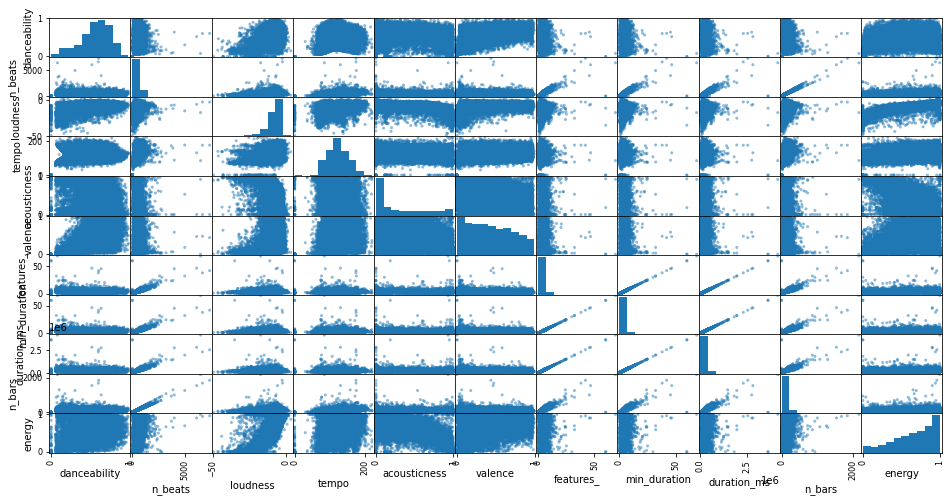

In [59]:

df_scatter_matrix = df_train.drop(columns=['name', 'artists', 'genre', 'explicit','album_name'])

    
    
pd.plotting.scatter_matrix(df_scatter_matrix[list(set(features_list))], figsize=(16, 8))
plt.show()



### Data correlation

Text(0.5, 1.0, 'Scatter plot of duration_ms and feature_duration_ms')

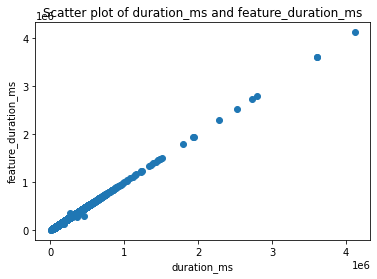

In [60]:
##Scatter plot of 'duration_ms' and 'feature_duration_ms'
plt.scatter(df_train['duration_ms'], df_train['features_duration_ms'])
plt.xlabel('duration_ms')
plt.ylabel('feature_duration_ms')
plt.title('Scatter plot of duration_ms and feature_duration_ms')

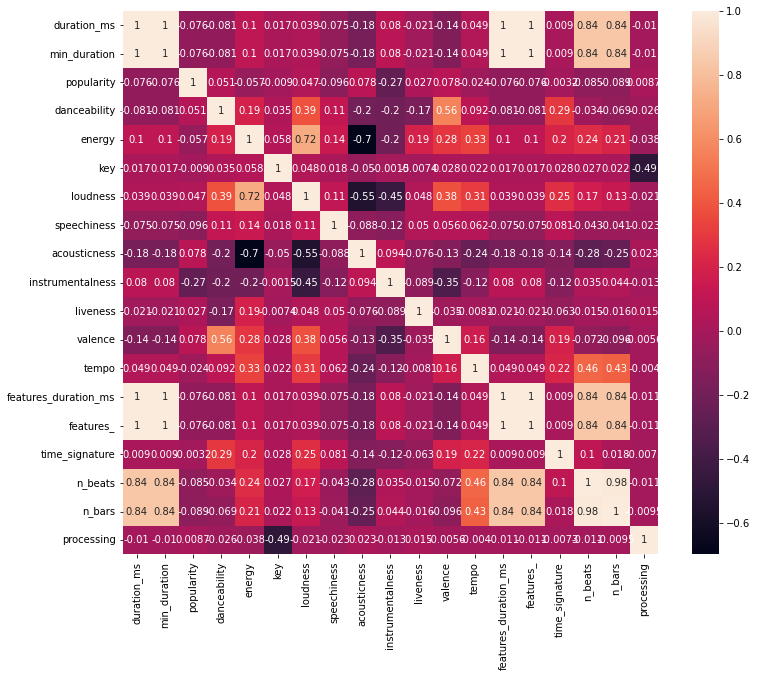

In [61]:
#Pearson correlation heatmap
import seaborn as sns
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'genre'], axis=1)

# Compute the correlation matrix and make it larger
plt.figure(figsize=(12, 10))
corr = df_mean.corr()
sns.heatmap(corr, annot=True)
plt.show()